Prediction of of NYC housing prices on district level.


In [1]:
import os
import pandas as pd

def load_data(data_path,file):
    csv_path = os.path.join(data_path, file)
    return pd.read_csv(csv_path)
    



Here is how the data is structured:

In [18]:
housing_data = load_data('datasets/housing','nyc-housing-sales.csv')
housing_data.info()
housing_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
Unnamed: 0                        84548 non-null int64
BOROUGH                           84548 non-null int64
NEIGHBORHOOD                      84548 non-null object
BUILDING CLASS CATEGORY           84548 non-null object
TAX CLASS AT PRESENT              84548 non-null object
BLOCK                             84548 non-null int64
LOT                               84548 non-null int64
EASE-MENT                         84548 non-null object
BUILDING CLASS AT PRESENT         84548 non-null object
ADDRESS                           84548 non-null object
APARTMENT NUMBER                  84548 non-null object
ZIP CODE                          84548 non-null int64
RESIDENTIAL UNITS                 84548 non-null int64
COMMERCIAL UNITS                  84548 non-null int64
TOTAL UNITS                       84548 non-null int64
LAND SQUARE FEET                  84548 non-null object
GRO

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00





Each row represents a house sale. Each sale has 21 attributes (borough, neigbourhood, building class, tax class at present, block, lot, easement, building class at present, address, apartment number, zip code, residential units, commercial units, total units, land square feet, gross square feet, year built, tax class at time of sale, building class at time of sale, sale price, sale date). 
We will clean redundant or irrerevant data before proceeding.








In [19]:

import matplotlib.pyplot as plt
housing_data.drop(['LOT', 'TAX CLASS AT PRESENT','TAX CLASS AT TIME OF SALE', 'EASE-MENT', 'APARTMENT NUMBER', 'BUILDING CLASS AT PRESENT', 'ADDRESS', 'BOROUGH ' ],axis=1, inplace=True)
housing_data.describe()
housing_data['NEIGHBORHOOD'].value_counts()



FLUSHING-NORTH               3068
UPPER EAST SIDE (59-79)      1736
UPPER EAST SIDE (79-96)      1590
UPPER WEST SIDE (59-79)      1439
BEDFORD STUYVESANT           1436
MIDTOWN EAST                 1418
BOROUGH PARK                 1245
ASTORIA                      1216
BAYSIDE                      1150
FOREST HILLS                 1069
SHEEPSHEAD BAY               1013
UPPER WEST SIDE (79-96)      1004
JACKSON HEIGHTS               992
EAST NEW YORK                 982
FLUSHING-SOUTH                918
MIDTOWN WEST                  918
HARLEM-CENTRAL                847
FLATBUSH-EAST                 846
BAY RIDGE                     832
CHELSEA                       803
ELMHURST                      802
CROWN HEIGHTS                 793
CANARSIE                      783
GREAT KILLS                   776
BUSHWICK                      769
RICHMOND HILL                 749
REGO PARK                     721
PARK SLOPE                    706
GRAVESEND                     705
TRIBECA       

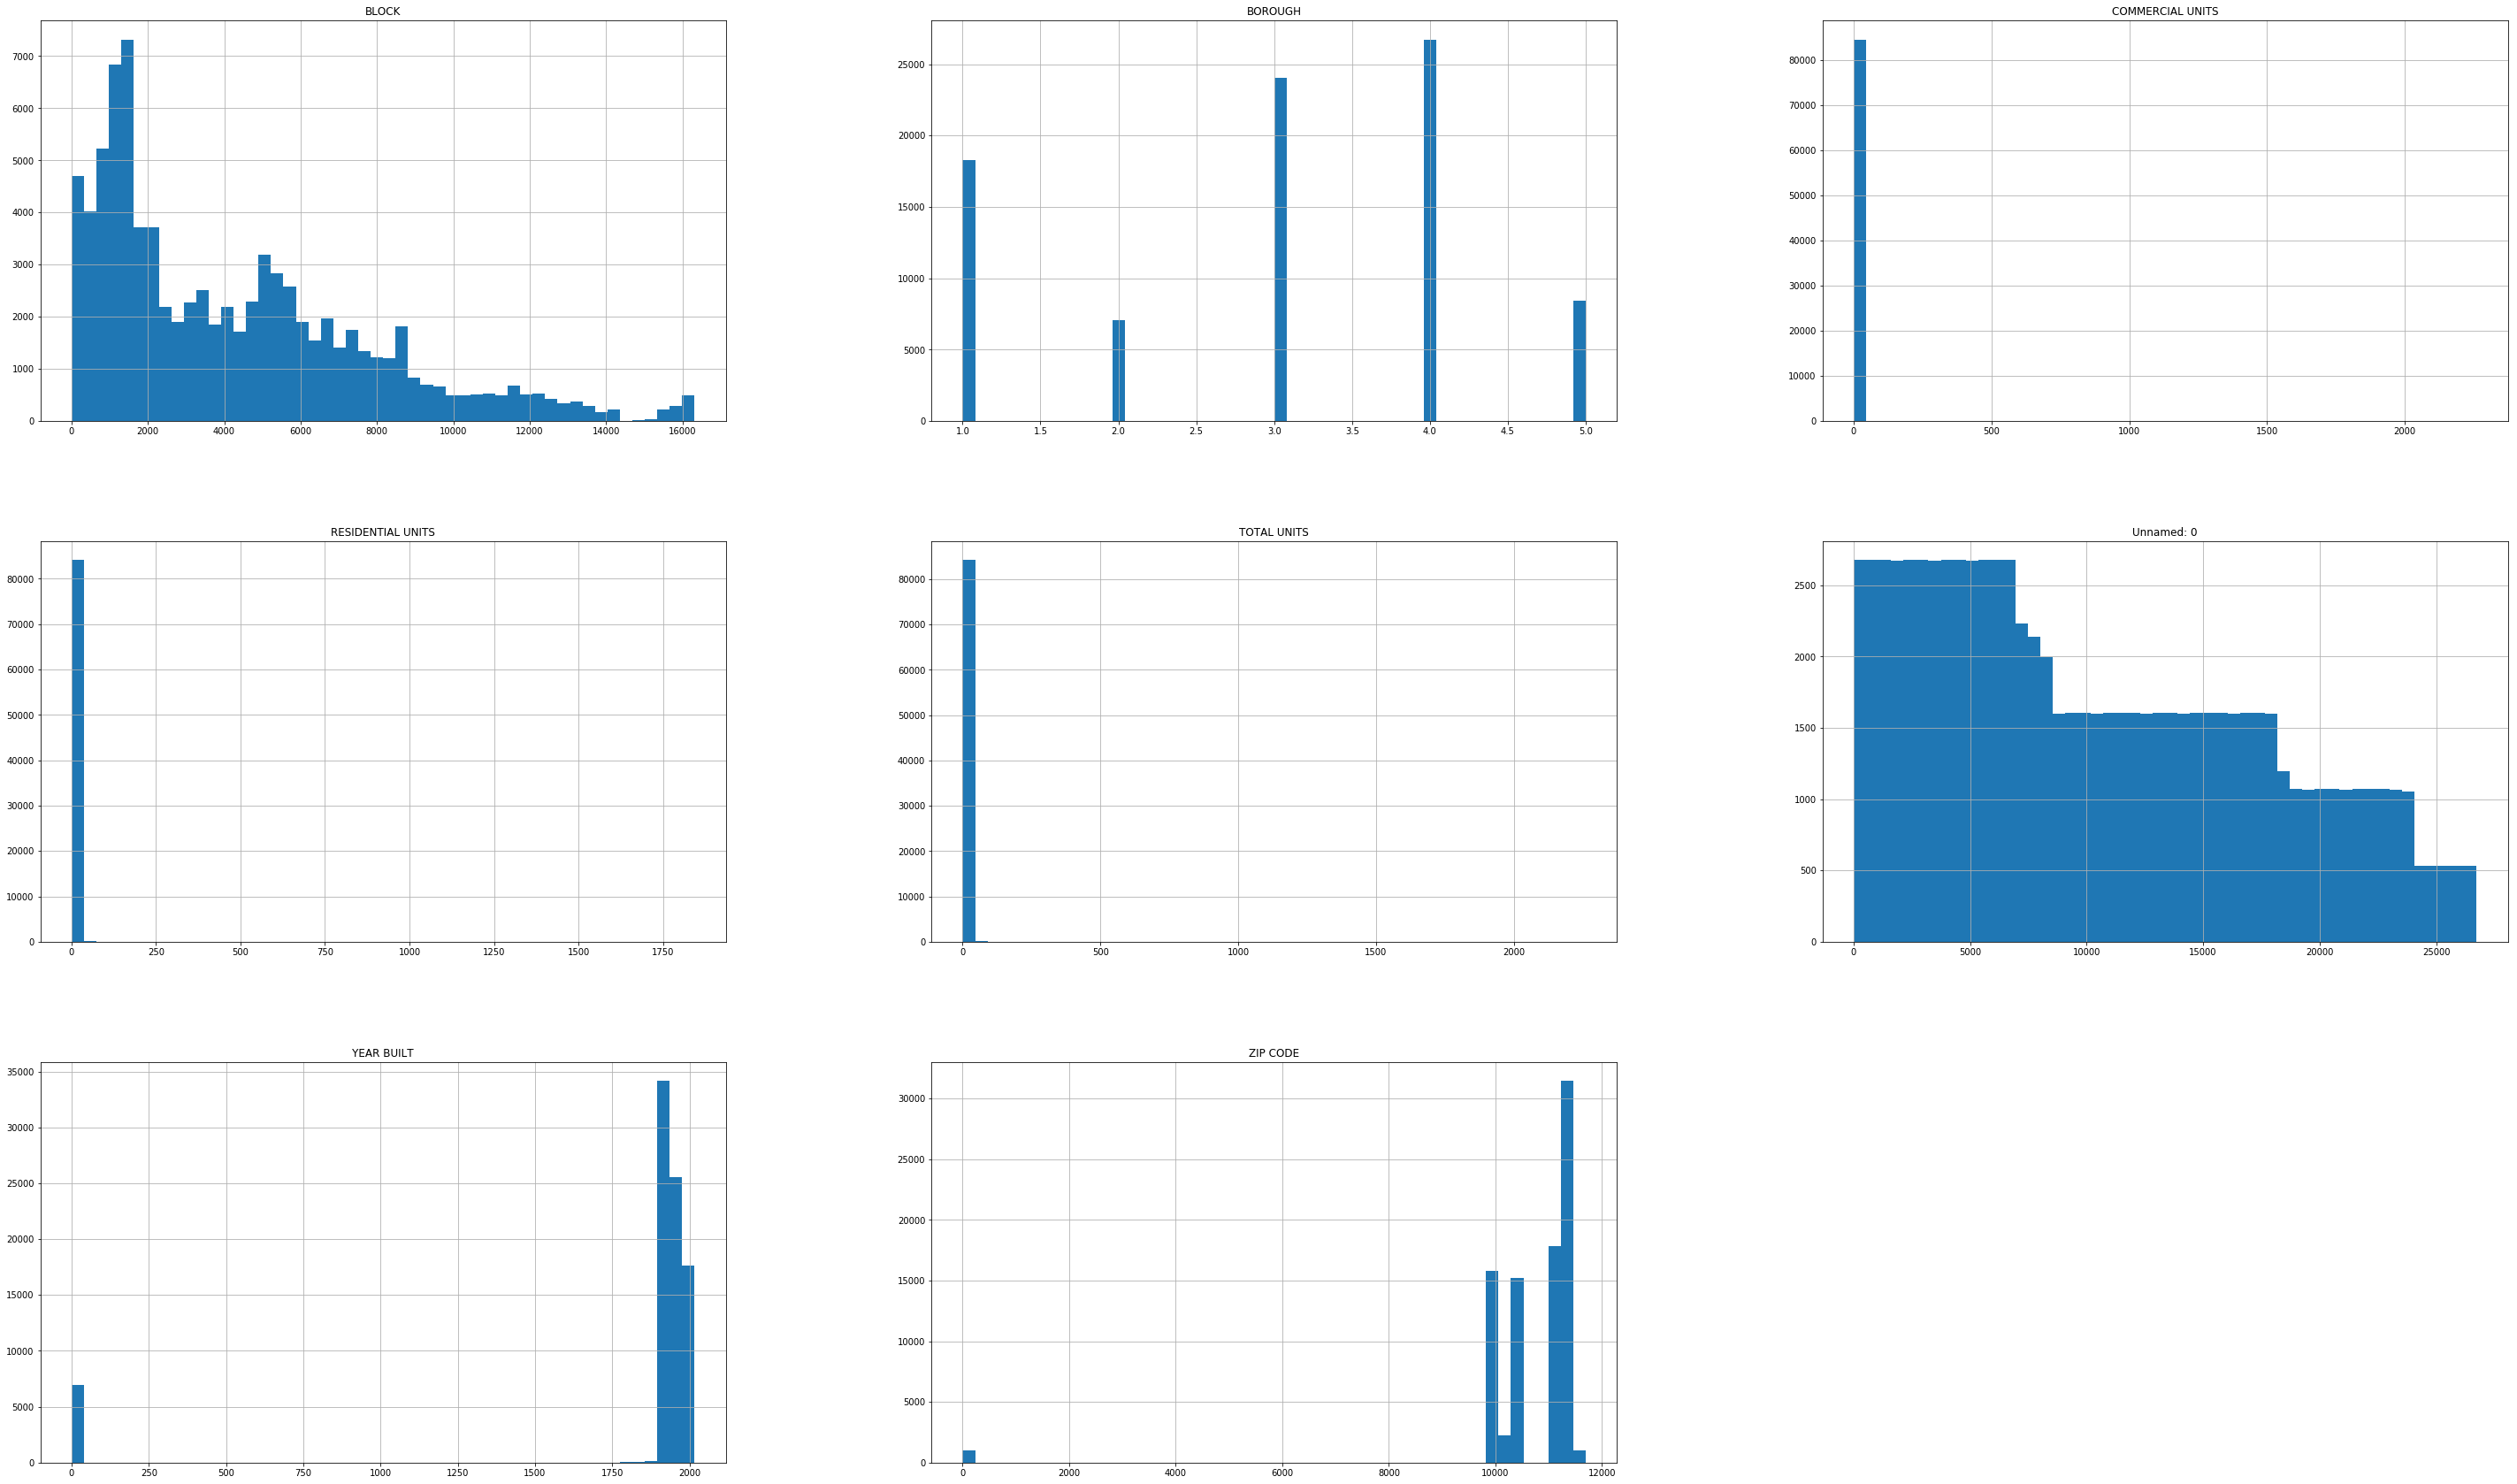

In [13]:
housing_data.hist(bins=50, figsize=(50,30));

Let's split our data into train and test sets(80/20)

In [62]:

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing_data, test_size=0.2)


16512
16512
